# Neural Turing Machine

##### Patrice Béchard, Orlando Marquez, Nicholas Vachon

This is a PyTorch implementation of the Neural Turing Machine, a memory augmented RNN with attention proposed by [Graves *et al* (2014)](https://arxiv.org/pdf/1410.5401.pdf). We only train the model on the *Copy* task presented in the paper.


In [1]:
from model2 import NTM, Vanilla_LSTM
from train2 import train
from utils import *

import matplotlib.pyplot as plt

## Setting

### Turing Machine

### Recurrent Neural Networks (RNN)

* Special type of neural networks that can take variable length inputs.
* Takes into account the temporal aspect of the inputs.

<img src="https://raw.githubusercontent.com/patricebechard/neural_turing_machine/master/figures/rnn.png" alt="RNN_Unfolded" width="800"/>

<img src="https://raw.githubusercontent.com/patricebechard/neural_turing_machine/master/figures/rnn_internals.png" alt="RNN_Internals" width="800"/>






### Long Short-Term Memory (LSTM)

* Type of RNN cell used to alleviate the problem with learning long term dependencies.

<img src="https://raw.githubusercontent.com/patricebechard/neural_turing_machine/master/figures/lstm_internals.png" alt="LSTM_Internals" width="800"/>



### Attention Mechanism

* First introduced for the problem of machine translation with sequence to sequence models.

<img src="https://raw.githubusercontent.com/patricebechard/neural_turing_machine/master/figures/seq2seq.png" alt="Seq2Seq" width="1000"/>

* Allows the model to *attend* to parts of the input at each timestep.

### External Memory



* RNNs (folded and unfolded)
* Attention mechanism (Seq2Seq example)
* External memory bank and motivation
* Turing Machine

$$
x = 3
$$

## The Model

The Neural Turing Machine (NTM) uses the attention mechanism to read to and write from an external memory bank.

<img src="https://raw.githubusercontent.com/patricebechard/neural_turing_machine/master/figures/ntm_simple.png" alt="NTM_Simple" width="800"/>
<img src="https://github.com/patricebechard/neural_turing_machine/blob/master/figures/ntm_unfolded.svg" alt="NTM_Unfolded" width="800"/>

Number of sequences processed : 0 ----- Cost per sequence(bits) : 0.700


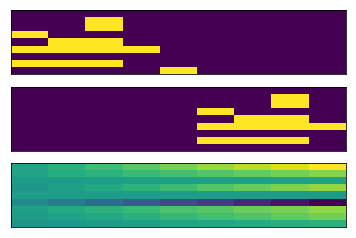

Number of sequences processed : 1000 ----- Cost per sequence(bits) : 0.493


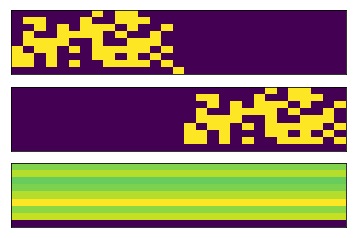

KeyboardInterrupt: 

In [2]:
hidden_size = 100
num_layers = 1
learning_rate = 1e-4

lstm_ntm = NTM('lstm').to(device)
train(lstm_ntm, learning_rate=learning_rate, save_model=False, show_plot=True, print_every=1000)

## The Task

The original paper contains 5 tasks on which the NTM is trained. Here, we only train the models on the *copy* task.

The copy task tests whether the neural turing machine can store and recall a long sequence of information. The input consists of a sequence of randomly varying length of eight bit random vectors, followed by a delimiter flag. The goal is to correctly copy every eight bit vectors in the same order after the delimiter is seen.

The hyperparameters used for each model trained on the task are presented in the table below:

| Model                   | Vanilla LSTM      | NTM with LSTM Controller | NTM with MLP Controller|
|-------------------------|-------------------|--------------------------|------------------------|
| hidden state size       |       256         |        100               |        100             |
| number of hidden layers |       3           |        1                 |       1                |
| memory size             |                   |         128 x 20         |    128 x 20            |
| number of heads         |                   |          1               |           1            |
| batch size              |        1          |        1                 |            1           |
| learning rate           |        3e-5       |          1e-4            |        1e-4            |
| momentum                |        0.9        |           0.9            |     0.9                |

Number of sequences processed : 0 ----- Cost per sequence(bits) : 0.701


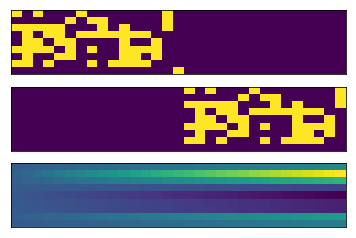

Number of sequences processed : 1000 ----- Cost per sequence(bits) : 0.359


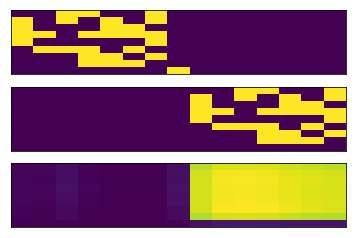

Number of sequences processed : 2000 ----- Cost per sequence(bits) : 0.288


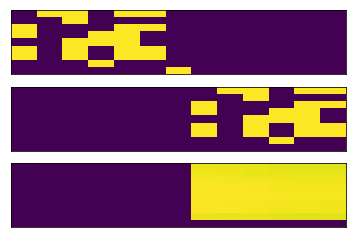

Number of sequences processed : 3000 ----- Cost per sequence(bits) : 0.287


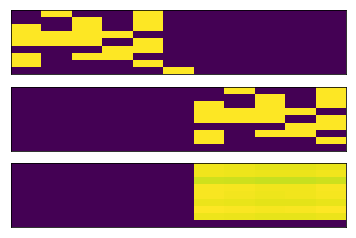

Number of sequences processed : 4000 ----- Cost per sequence(bits) : 0.285


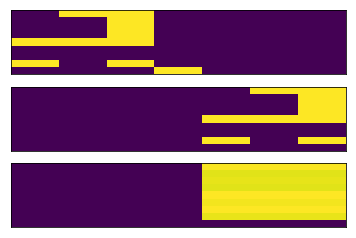

Number of sequences processed : 5000 ----- Cost per sequence(bits) : 0.287


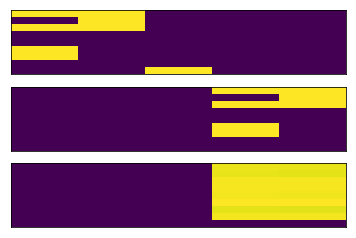

Number of sequences processed : 6000 ----- Cost per sequence(bits) : 0.287


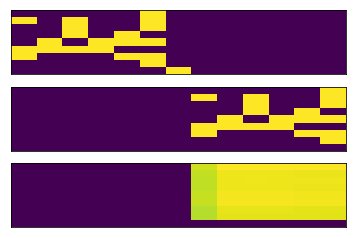

Number of sequences processed : 7000 ----- Cost per sequence(bits) : 0.286


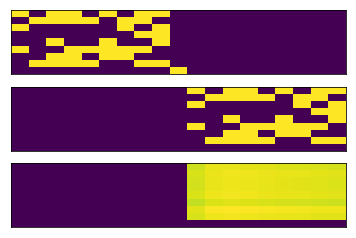

Number of sequences processed : 8000 ----- Cost per sequence(bits) : 0.285


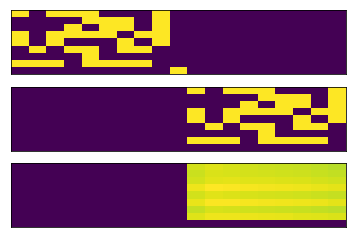

Number of sequences processed : 9000 ----- Cost per sequence(bits) : 0.283


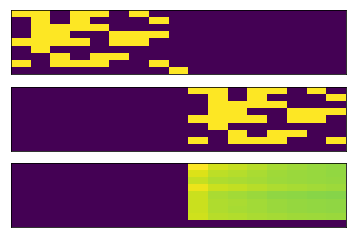

Number of sequences processed : 10000 ----- Cost per sequence(bits) : 0.284


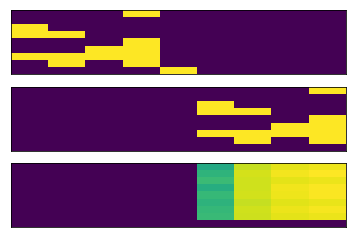

Number of sequences processed : 11000 ----- Cost per sequence(bits) : 0.279


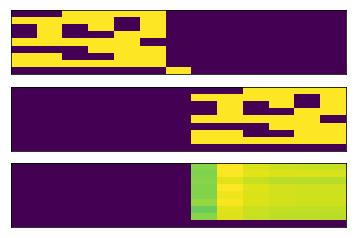

Number of sequences processed : 12000 ----- Cost per sequence(bits) : 0.284


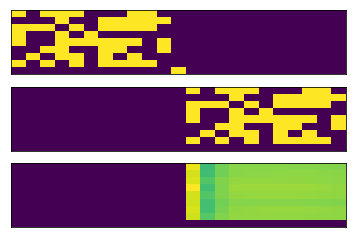

Number of sequences processed : 13000 ----- Cost per sequence(bits) : 0.278


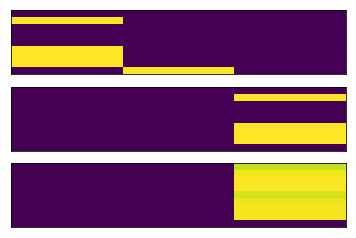

Number of sequences processed : 14000 ----- Cost per sequence(bits) : 0.278


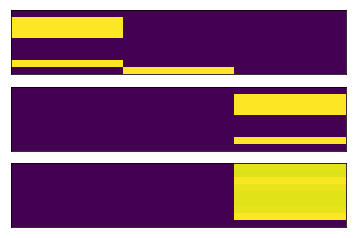

Number of sequences processed : 15000 ----- Cost per sequence(bits) : 0.277


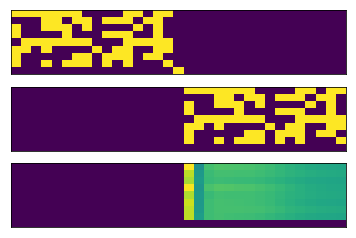

Number of sequences processed : 16000 ----- Cost per sequence(bits) : 0.277


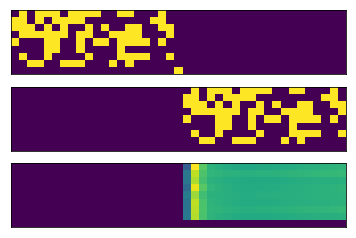

Number of sequences processed : 17000 ----- Cost per sequence(bits) : 0.276


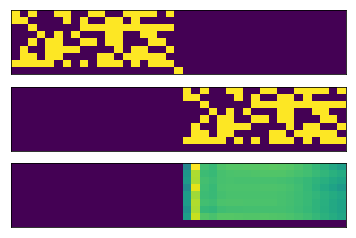

Number of sequences processed : 18000 ----- Cost per sequence(bits) : 0.275


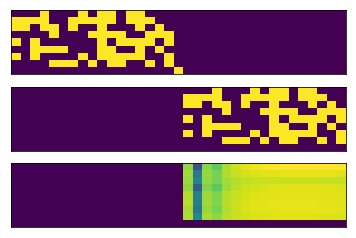

Number of sequences processed : 19000 ----- Cost per sequence(bits) : 0.275


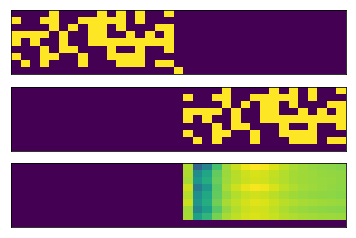

Number of sequences processed : 20000 ----- Cost per sequence(bits) : 0.275


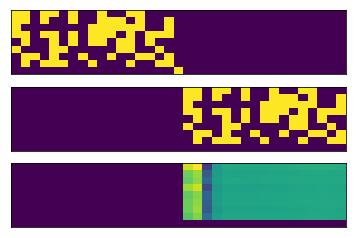

In [ ]:
train(lstm_ntm, show_plot=True, save_model=True, print_every=1000)

In [ ]:
train(ffnn_ntm, show_plot=True)

### Going further


https://rylanschaeffer.github.io/content/research/neural_turing_machine/main.html
    
https://distill.pub/2016/augmented-rnns/
    
https://arxiv.org/pdf/1410.5401.pdf

In [ ]:
def show_generalization(model):
    
    # showing models results on inputs of size 10, 20, 30, 50, 120
    
    sequence_lengths = [10, 20, 30, 50, 120]
    
    inputs = []
    outputs = []
    
    for i, seq_len in enumerate(sequence_lengths):
        
        input, _ = generate_input_example(sequence_length=seq_len)
        inputs.append(input[:seq_len])
        
        outputs.append(model(input.to(device)).to('cpu')[seq_len+1:])


    # creating plot similar to figure 4 from Graves et. al. 2014
    
    fig = plt.figure(figsize=(20, 4))
    
    gs1 = gridspec.GridSpec(4, 11)
    gs1.update(left=0.05, right=0.48, wspace=0.33)

    # targets for 10, 20, 30, 50
    ax1 = plt.subplot(gs1[0, 0:1])
    ax1.matshow(inputs[0].data.squeeze().numpy().T)
    ax1.axis('off')
    ax2 = plt.subplot(gs1[0, 1:3])
    ax2.matshow(inputs[1].data.squeeze().numpy().T)
    ax2.axis('off')
    ax3 = plt.subplot(gs1[0, 3:6])
    ax3.matshow(inputs[2].data.squeeze().numpy().T)
    ax3.axis('off')
    ax4 = plt.subplot(gs1[0, 6:11])
    ax4.matshow(inputs[3].data.squeeze().numpy().T)
    ax4.axis('off')
    
    # outputs for 10, 20, 30, 50
    ax5 = plt.subplot(gs1[1, 0:1])
    ax5.matshow(outputs[0].data.squeeze().numpy().T)
    ax5.axis('off')
    ax6 = plt.subplot(gs1[1, 1:3])
    ax6.matshow(outputs[1].data.squeeze().numpy().T)
    ax6.axis('off')
    ax7 = plt.subplot(gs1[1, 3:6])
    ax7.matshow(outputs[2].data.squeeze().numpy().T)
    ax7.axis('off')
    ax8 = plt.subplot(gs1[1, 6:11])
    ax8.matshow(outputs[3].data.squeeze().numpy().T)
    ax8.axis('off')
    
    # targets and outputs for 120
    ax9 = plt.subplot(gs1[2, 0:11])
    ax9.matshow(inputs[4].data.squeeze().numpy().T)
    ax9.axis('off')
    ax10 = plt.subplot(gs1[3, 0:11])
    ax10.matshow(outputs[4].data.squeeze().numpy().T)
    ax10.axis('off')

    plt.show()

In [ ]:
model = NTM('lstm').to(device)

show_generalization(model)